In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib.colors import LogNorm

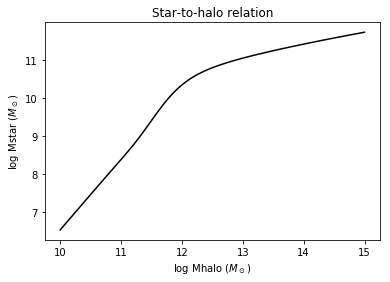

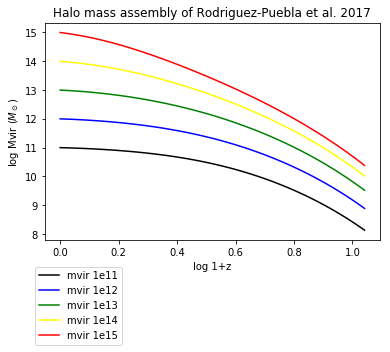

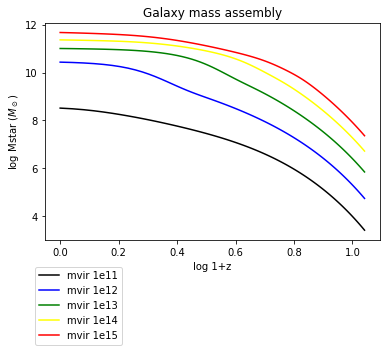

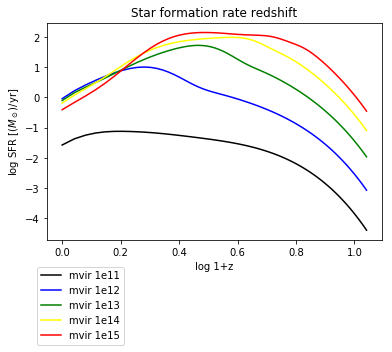

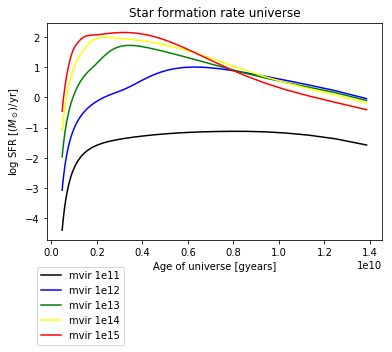

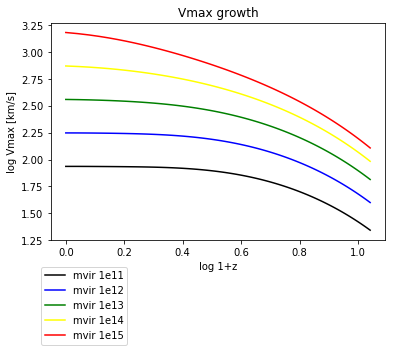

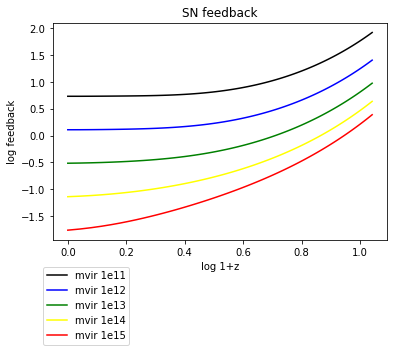

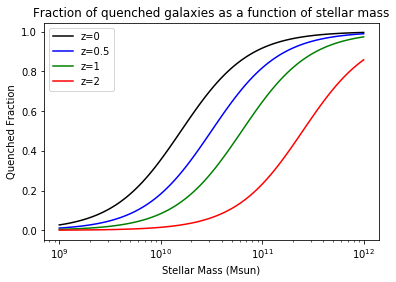

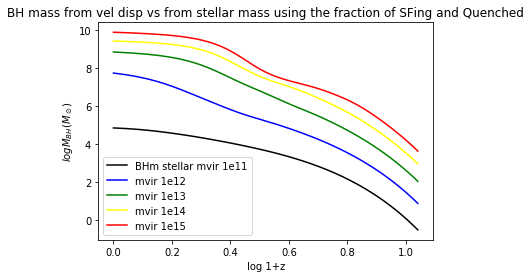

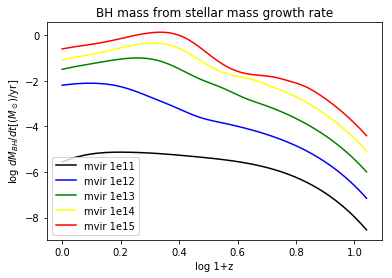

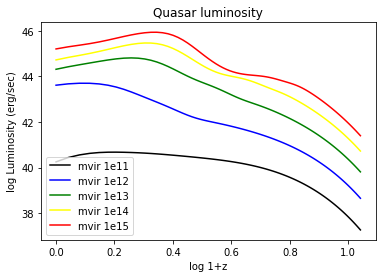

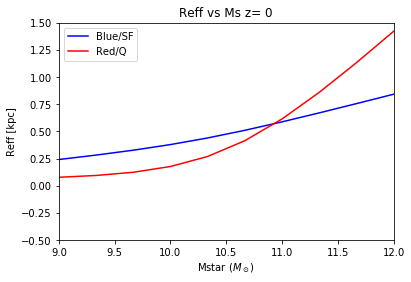

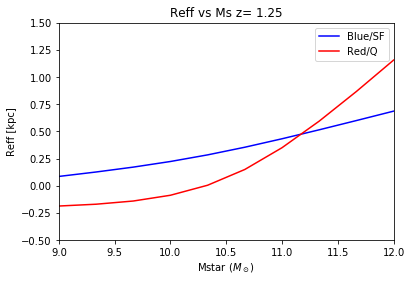

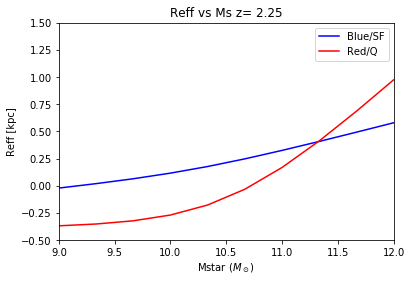

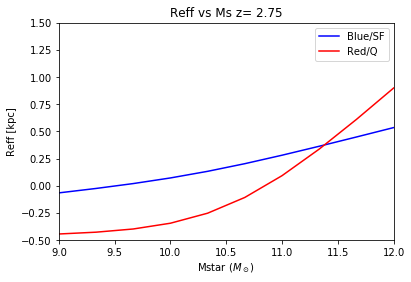

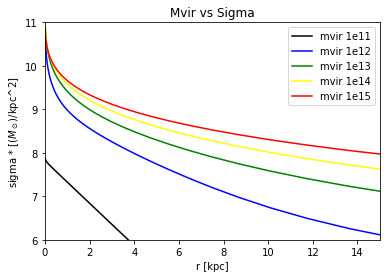

In [2]:
from galaxy_halo_quenched import *

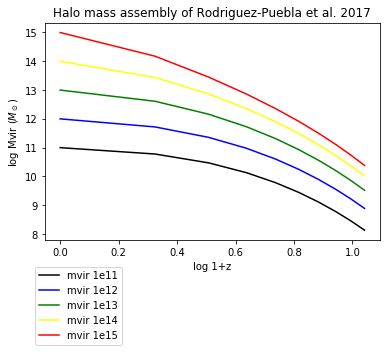

In [6]:
#fig, ax = plt.subplots()
#cmap = plt.cm.get_cmap("inferno")
#cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend= extend, origin=origin)
#divider1 = make_axes_locatable(ax)
#cb1 = fig.colorbar(cs, ax= ax, shrink=0.9)
##cb1.ax.tick_params(direction="in") #Change color bar label size



#plt.axis([0, 1, 10, 15])

#color_map = plt.imshow(sfr)
#color_map.set_cmap("hsv")
#plt.colorbar()
#plt.savefig("out.png")

Mvirz = halo_mass_assembly(Mvir0[0], z0, redshift)
Mvirz2 = halo_mass_assembly(Mvir0[1], z0, redshift)
Mvirz3 = halo_mass_assembly(Mvir0[2], z0, redshift)
Mvirz4 = halo_mass_assembly(Mvir0[3], z0, redshift)
Mvirz5 = halo_mass_assembly(Mvir0[4], z0, redshift)

plt.title('Halo mass assembly of Rodriguez-Puebla et al. 2017')
plt.plot(np.log10(1+redshift), np.log10(Mvirz), color='black', label='mvir 1e11')
plt.plot(np.log10(1+redshift), np.log10(Mvirz2), color='blue', label='mvir 1e12')
plt.plot(np.log10(1+redshift), np.log10(Mvirz3), color='green', label='mvir 1e13')
plt.plot(np.log10(1+redshift), np.log10(Mvirz4), color='yellow', label='mvir 1e14')
plt.plot(np.log10(1+redshift), np.log10(Mvirz5), color='red', label='mvir 1e15')

plt.xlabel('log 1+z')
plt.ylabel('log Mvir ($M_\odot$)')
plt.legend(loc=9, bbox_to_anchor=(0.1, -0.1), ncol=1)
plt.axis = ([0, 1, 10, 15])
plt.show()

z0 = 0    
redshift = np.linspace (z0, 10, 10)
Mvir0 = (1e11, 1e12, 1e13, 1e14, 1e15) 


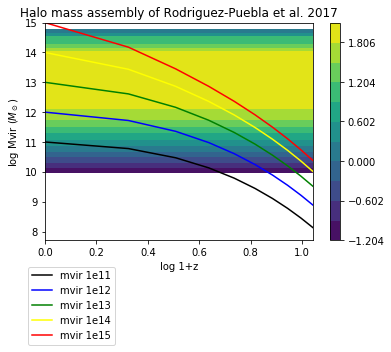

In [8]:
logmvir_ini = 10.5
logmvir_f = 15
nsteps = 100
nsteps_z = 100 


delta = (logmvir_f - logmvir_ini) / nsteps

#print(delta)


y = []
x = []
a = []

for i in range(0, nsteps_z+1):
    
    z_i = i/10
    
    x.append(np.log10(z_i+1))
   
    
    for j in range(0, nsteps+1):
        
        logmvir_j = logmvir_ini + (delta * j) 
        
        mvir_i0 = 10**logmvir_j
        
        mvir_z = halo_mass_assembly(mvir_i0, z0, z_i)
       
        y.append(np.log10(mvir_z))
        
        sfr_j = SFR(mvir_i0, z0, z_i)
       
        a.append(np.log10(sfr_j))
        #print(a)
        
        
 


#x = redshift
#y = mvir
#a = sfr
#z = meshgrid of sfr

xx, aa = np.meshgrid(x, a, sparse=True)
z = xx*0. + aa #needs xx and aa to be a 2x2 array
#z = xx + aa

Mvirz = halo_mass_assembly(Mvir0[0], z0, redshift)
Mvirz2 = halo_mass_assembly(Mvir0[1], z0, redshift)
Mvirz3 = halo_mass_assembly(Mvir0[2], z0, redshift)
Mvirz4 = halo_mass_assembly(Mvir0[3], z0, redshift)
Mvirz5 = halo_mass_assembly(Mvir0[4], z0, redshift)


plt.title('Halo mass assembly of Rodriguez-Puebla et al. 2017')
plt.plot(np.log10(1+redshift), np.log10(Mvirz), '-k', color='black', label='mvir 1e11')
plt.plot(np.log10(1+redshift), np.log10(Mvirz2), '-k', color='blue', label='mvir 1e12')
plt.plot(np.log10(1+redshift), np.log10(Mvirz3), '-k', color='green', label='mvir 1e13')
plt.plot(np.log10(1+redshift), np.log10(Mvirz4), '-k', color='yellow', label='mvir 1e14')
plt.plot(np.log10(1+redshift), np.log10(Mvirz5), '-k', color='red', label='mvir 1e15')
plt.xlabel('log 1+z')
plt.ylabel('log Mvir ($M_\odot$)')
plt.legend(loc=9, bbox_to_anchor=(0.1, -0.1), ncol=1)
z0 = 0    
redshift = np.linspace (z0, 10, 10)
Mvir0 = (1e11, 1e12, 1e13, 1e14, 1e15) 



levels = [np.log10(0.0625), np.log10(0.125), np.log10(0.25), np.log10(0.5), np.log10(1),
          np.log10(2), np.log10(4), np.log10(8), np.log10(16), np.log10(32), np.log10(64), np.log10(128)]

#levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]

h = plt.contourf(x,y, z, levels)

#h = plt.contourf(x,y,z, cmap = 'jet',) 

plt.colorbar() 

plt.axis = ([0, 1, 10, 15])

plt.show() 




#print(z)
#print(y)
#print(len(x))
#print(len(y))
#print(len(z))
#print(xx.shape)
#print(aa.shape)
#print(z.shape)






In [5]:
#virial mass can't be at the begining of the loop beacuse of dimensions

logmvir_ini = 10.5
logmvir_f = 15
nsteps = 100
nsteps_z = 100
z0 = 0 


delta = (logmvir_f - logmvir_ini) / nsteps

#print(delta)


y = []
x = []
a = []

for i in range(1, nsteps+1):
    #print(i)
    logmvir_i = logmvir_ini + (delta * i) 
    #y.append(logmvir_i)
    mvir_i0 = 10**logmvir_i
    mvir_z = halo_mass_assembly(mvir_i0, z0, z_i)
    y.append(np.log10(mvir_z))
    #print (mvir_i0)
    
    
    for j in range(1, nsteps_z+1):
        z_i = j
        #x.append(np.log10(z_i+1))
        x.append(z_i+1)
        #print(mvir_z)
        sfr_i = SFR(mvir_i0, z0, z_i)
        #Z = np.log10(sfr_i)
        a.append(sfr_i)
        #print(sfr_i)
        
 


xx, aa = np.meshgrid(x, a, sparse=True)
#print(yy,aa)
#print(len(xx), len(aa))

z = xx*0. + aa

h = plt.contourf(x,y,z)
plt.show()



print(len(x))
print(len(y))
print(len(z))
print(xx.shape)
print(aa.shape)
print(z.shape)
print('length of y must be number of rows in z''(row,column)')
print(x)

/Users/ximena/Desktop/coding/Stellar_to_halo_evolution/galaxy_halo_quenched.py:112: RuntimeWarning: overflow encountered in double_scalars
  return (-np.log10(10**(-a*x)+1.) +


ValueError: f(a) and f(b) must have different signs

In [ ]:
logmvir_ini = 10.5
logmvir_f = 15
nsteps = 100
nsteps_z = 100 


delta = (logmvir_f - logmvir_ini) / nsteps

#print(delta)


sfr = []
x = []
y = []

for i in range(1, nsteps_z+1):
    
    z_i = i/10
    
    a = []
   
    
    for j in range(1, nsteps+1):
        
        logmvir_j = logmvir_ini + (delta * j) 
        
        mvir_i0 = 10**logmvir_j
        
        mvir_z = halo_mass_assembly(mvir_i0, z0, z_i)
       
        y.append(np.log10(mvir_z))
        
        sfr_j = SFR(mvir_i0, z0, z_i)
       
        a.append(np.log10(sfr_j))
        #print(a)
        
    sfr.append(a)   
 


#x = redshift
#y = mvir
#a = sfr
#z = meshgrid of sfr

xx, aa = np.meshgrid(x, sfr, sparse=True)
z = xx*0 + sfr #needs xx and aa to be a 2x2 array
#z = xx + aa

Mvirz = halo_mass_assembly(Mvir0[0], z0, redshift)
Mvirz2 = halo_mass_assembly(Mvir0[1], z0, redshift)
Mvirz3 = halo_mass_assembly(Mvir0[2], z0, redshift)
Mvirz4 = halo_mass_assembly(Mvir0[3], z0, redshift)
Mvirz5 = halo_mass_assembly(Mvir0[4], z0, redshift)


plt.title('Halo mass assembly of Rodriguez-Puebla et al. 2017')
plt.plot(np.log10(1+redshift), np.log10(Mvirz), '-k', color='black', label='mvir 1e11')
plt.plot(np.log10(1+redshift), np.log10(Mvirz2), '-k', color='blue', label='mvir 1e12')
plt.plot(np.log10(1+redshift), np.log10(Mvirz3), '-k', color='green', label='mvir 1e13')
plt.plot(np.log10(1+redshift), np.log10(Mvirz4), '-k', color='yellow', label='mvir 1e14')
plt.plot(np.log10(1+redshift), np.log10(Mvirz5), '-k', color='red', label='mvir 1e15')
plt.xlabel('log 1+z')
plt.ylabel('log Mvir ($M_\odot$)')
plt.legend(loc=9, bbox_to_anchor=(0.1, -0.1), ncol=1)
z0 = 0    
redshift = np.linspace (z0, 10, 10)
Mvir0 = (1e11, 1e12, 1e13, 1e14, 1e15) 



levels = [np.log10(0.0625), np.log10(0.125), np.log10(0.25), np.log10(0.5), np.log10(1),
          np.log10(2), np.log10(4), np.log10(8), np.log10(16), np.log10(32), np.log10(64), np.log10(128)]

#levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]
#color_map = plt.imshow(sfr)
#levels = [np.log10(0.0625), np.log10(0.125), np.log10(0.25), np.log10(0.5), np.log10(1),
          #np.log10(2), np.log10(4), np.log10(8), np.log10(16), np.log10(32), np.log10(64), np.log10(128)]

xx, aa = np.meshgrid(x, a, sparse=True)
#print(yy,aa)
#print(len(xx), len(aa))

z = xx + aa

h = plt.contourf(x,y, z, levels)

#h = plt.contourf(x,y,z, cmap = 'jet',) 

plt.colorbar() 

plt.axis = ([0, 1, 10, 15])

plt.show() 

